<a href="https://colab.research.google.com/github/9-coding/TensorFlow/blob/main/deep_multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
469/469 - 19s - loss: 0.3972 - accuracy: 0.9003 - val_loss: 0.1717 - val_accuracy: 0.9499 - 19s/epoch - 41ms/step
Epoch 2/50
469/469 - 17s - loss: 0.1445 - accuracy: 0.9581 - val_loss: 0.1238 - val_accuracy: 0.9634 - 17s/epoch - 35ms/step
Epoch 3/50
469/469 - 27s - loss: 0.0988 - accuracy: 0.9713 - val_loss: 0.1087 - val_accuracy: 0.9675 - 27s/epoch - 59ms/step
Epoch 4/50
469/469 - 20s - loss: 0.0731 - accuracy: 0.9785 - val_loss: 0.0837 - val_accuracy: 0.9743 - 20s/epoch - 42ms/step
Epoch 5/50
469/469 - 18s - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0792 - val_accuracy: 0.9750 - 18s/epoch - 39ms/step
Epoch 6/50
469/469 - 17s - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0678 - val_accuracy: 0.9790 - 17s/epoch - 36ms/step
Epoch 7/50
469/469 - 17s - loss: 0.0328 - accuracy: 0.9906 - val_loss: 0.0653 - val_accuracy: 0.9791 - 17s/epoch - 37ms/step
Epoch 8/50
469/469 - 18s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.0658 - val_accuracy: 0.9793 - 18s/epoch - 38ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


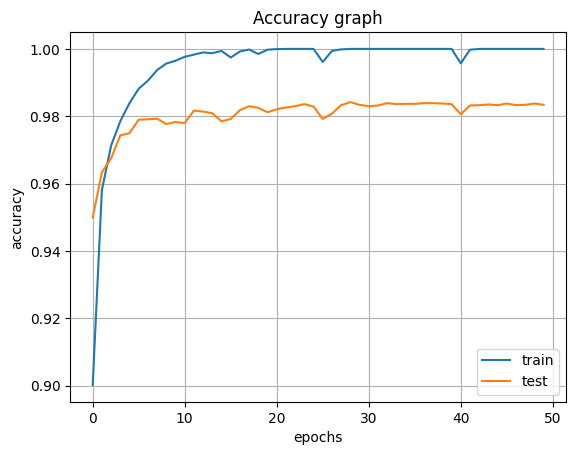

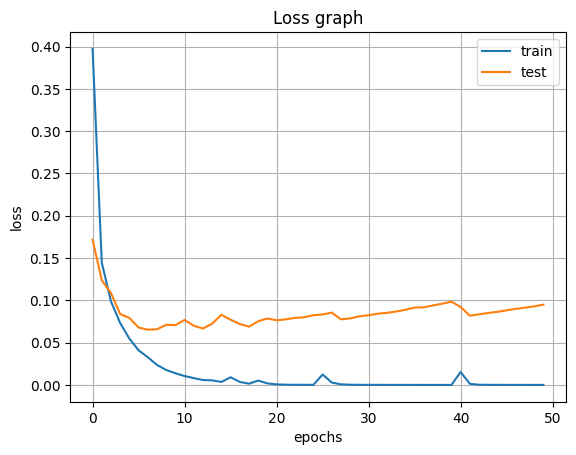

In [2]:
# Deep multi-layer perceptron with MNIST

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test)=ds.mnist.load_data()
# 28x28을 784로 펼침.
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
# 원래 데이터형 unit8을 실수 연산을 위해 float32로 변환, [0,255] 범위를 [0,1]로.
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
# 0~9 사이의 정수로 표현된 것을 one-hot-vector로 변환.
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# dmlp 모델 구성
dmlp=Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,))) # 은닉층에 1024개, 입력층에 784개 노드 배치.
dmlp.add(Dense(units=512, activation='relu')) # 은닉층에 512개 노드 배치.
dmlp.add(Dense(units=512, activation='relu')) # 은닉층에 512개 노드 배치.
dmlp.add(Dense(units=10, activation='softmax')) # 출력층에 노드 10개 배치 (카테고리가 10개)

# 모델 학습
# compile과 fit 동시에 사용.
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist=dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확도=', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

# 모델 저장
dmlp.save('dmlp_trained.h5')

# 그래프 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs') # x축 제목
plt.ylabel('accuracy') # y축 제목
plt.legend(['train', 'test']) # 범례
plt.grid() # 격자
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs') # x축 제목
plt.ylabel('loss') # y축 제목
plt.legend(['train', 'test']) # 범례
plt.grid() # 격자
plt.show()

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/50
391/391 - 44s - loss: 1.8223 - accuracy: 0.3461 - val_loss: 1.6728 - val_accuracy: 0.3982 - 44s/epoch - 111ms/step
Epoch 2/50
391/391 - 42s - loss: 1.6188 - accuracy: 0.4255 - val_loss: 1.5626 - val_accuracy: 0.4473 - 42s/epoch - 107ms/step
Epoch 3/50
391/391 - 41s - loss: 1.5369 - accuracy: 0.4551 - val_loss: 1.5173 - val_accuracy: 0.4616 - 41s/epoch - 104ms/step
Epoch 4/50
391/391 - 40s - loss: 1.4738 - accuracy: 0.4788 - val_loss: 1.4702 - val_accuracy: 0.4775 - 40s/epoch - 102ms/step
Epoch 5/50
391/391 - 41s - loss: 1.4203 - accuracy: 0.4974 - val_loss: 1.4440 - val_accuracy: 0.4854 - 41s/epoch - 106ms/step
Epoch 6/50
391/391 - 43s - loss: 1.3769 - accuracy: 0.5126 - val_loss: 1.4588 - val_accuracy: 0.4865 - 43s/epoch - 109ms/step
Epoch 7/50
391/391 - 39s - loss: 1.3399 - accuracy: 0.5242 - val_loss: 1.3960 - val_accuracy: 0.4992 - 39s/epoch - 100ms/step
Epoch 8/50
391/391 - 40s - loss: 1.3002 - accuracy:

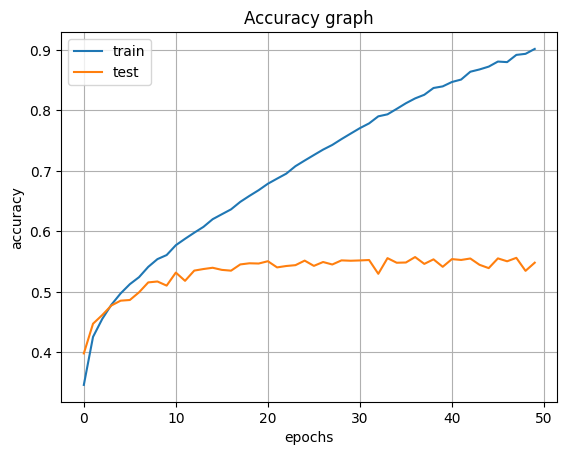

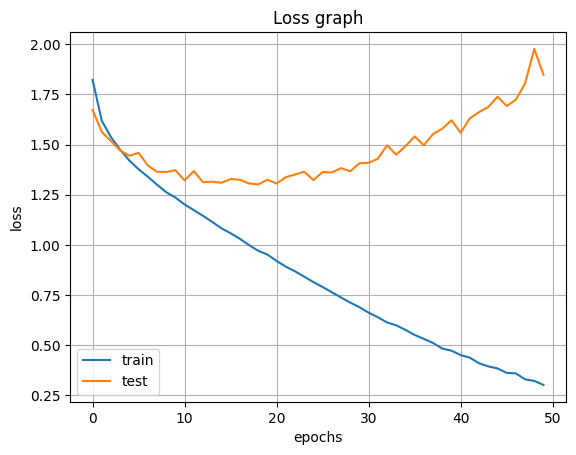

In [1]:
# Deep multi-layer perceptron with CIFAR-10

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test)=ds.cifar10.load_data()
# 28x28을 784로 펼침.
x_train=x_train.reshape(50000, 3072)
x_test=x_test.reshape(10000, 3072)
# 원래 데이터형 unit8을 실수 연산을 위해 float32로 변환, [0,255] 범위를 [0,1]로.
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
# 0~9 사이의 정수로 표현된 것을 one-hot-vector로 변환.
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# dmlp 모델 구성
dmlp=Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,))) # 은닉층에 1024개, 입력층에 3072개 노드 배치.
dmlp.add(Dense(units=512, activation='relu')) # 은닉층에 512개 노드 배치.
dmlp.add(Dense(units=512, activation='relu')) # 은닉층에 512개 노드 배치.
dmlp.add(Dense(units=10, activation='softmax')) # 출력층에 노드 10개 배치  (카테고리가 10개)

# 모델 학습
# compile과 fit 동시에 사용.
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist=dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확도=', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

# 그래프 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs') # x축 제목
plt.ylabel('accuracy') # y축 제목
plt.legend(['train', 'test']) # 범례
plt.grid() # 격자
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs') # x축 제목
plt.ylabel('loss') # y축 제목
plt.legend(['train', 'test']) # 범례
plt.grid() # 격자
plt.show()